### 0. Importing modules and data

In [123]:
import pandas as pd
import os
from edastatmil_milser import edas_tatmil as EDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score
from pickle import dump
import matplotlib.pyplot as plt
import numpy as np

In [99]:
raw_df = pd.read_csv('../data/raw/Playstore.csv')
raw_df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


### 1. Data treatment

In [100]:
df_ = raw_df.copy()

In [101]:
df = df_.drop('package_name', axis=1)
df["review"] = df["review"].str.strip().str.lower()
df.to_csv('../data/processed/Playstore_trated.csv')
df

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


In [102]:
predictors = ['review']
target ='polarity'
EDA.splitter('../data/processed/', predictors, target)

{'Playstore_trated_Xtrain':                                                 review
 445  cant see new emoticons i have a sony xperia z3...
 650  malayalam font overlapping malayalam fonts are...
 172  so fun! i'm totally addicted to this game. i p...
 450  doesn't refresh properly i added a few contact...
 314  shake function not working. my we chat was upd...
 ..                                                 ...
 106  why can't i share my achievements? recently di...
 270  beta is the best version of the chrome browser...
 860  great little game. this is a great little game...
 435  keeps crashing ever since i started using it m...
 102  even though i am loving the new update, but th...
 
 [623 rows x 1 columns],
 'Playstore_trated_Xtest':                                                 review
 709  love/hate has bug and security issues. i tried...
 439  whatsapp i use this app now that blackberry me...
 840                           usefully verry  nice app
 720  fonts why in the h

In [103]:
Xtrain = pd.read_csv('../data/processed/SplitData/Playstore_trated_Xtrain.csv')
Xtest = pd.read_csv('../data/processed/SplitData/Playstore_trated_Xtest.csv')
ytrain = pd.read_csv('../data/processed/SplitData/Playstore_trated_ytrain.csv')
ytest = pd.read_csv('../data/processed/SplitData/Playstore_trated_ytest.csv')

In [104]:
Xtrain_ = Xtrain['review']
Xtest_ = Xtest['review']

### 2. Naive Bayes model
#### 2.1 Transform into text matrix

In [105]:
vec_model = CountVectorizer(stop_words = "english")
Xtrain_ = vec_model.fit_transform(Xtrain_).toarray()
Xtest_ = vec_model.transform(Xtest_).toarray()

#### 2.2 Import model and train
Since we have classification with binary features, we will choose Bernoulli NB, but we test all alternatves.

In [106]:
Bernouilli_model = BernoulliNB()
Bernouilli_model.fit(Xtrain_, ytrain)

Gaussian_model = GaussianNB()
Gaussian_model.fit(Xtrain_, ytrain)

Multinomial_model = MultinomialNB()
Multinomial_model.fit(Xtrain_, ytrain)

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

#### 2.3 Prediction and test

In [120]:
Bernouilli_ypred = Bernouilli_model.predict(Xtest_)
BAC = accuracy_score(ytest, Bernouilli_ypred)
print('Accuracy: ', BAC)

Gaussian_ypred = Gaussian_model.predict(Xtest_)
GAC = accuracy_score(ytest, Gaussian_ypred)
print('Accuracy: ', GAC)

Multinomial_ypred = Multinomial_model.predict(Xtest_)
MAC = accuracy_score(ytest, Multinomial_ypred)
print('Accuracy: ', MAC)

Accuracy:  0.7686567164179104
Accuracy:  0.7985074626865671
Accuracy:  0.8134328358208955


In [121]:
def compare(accuracies):
    modelos = ['Bernoulli', 'Gaussian', 'Multinomial']    

    plt.figure(figsize=(8, 6))
    plt.bar(modelos, accuracies, color=["#4C72B0", "#55A868", "#C44E52"])
    plt.xlabel('Modelo')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

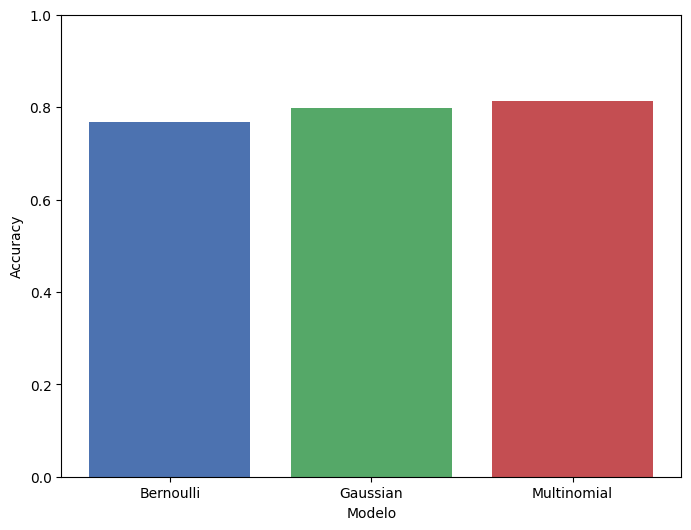

In [122]:
acc1 = [BAC,GAC,MAC]
compare(acc1)

Multinomial seems to be the best fitting. Lets try to optimize.

#### 2.4 Optimization

#### Bernouilli

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

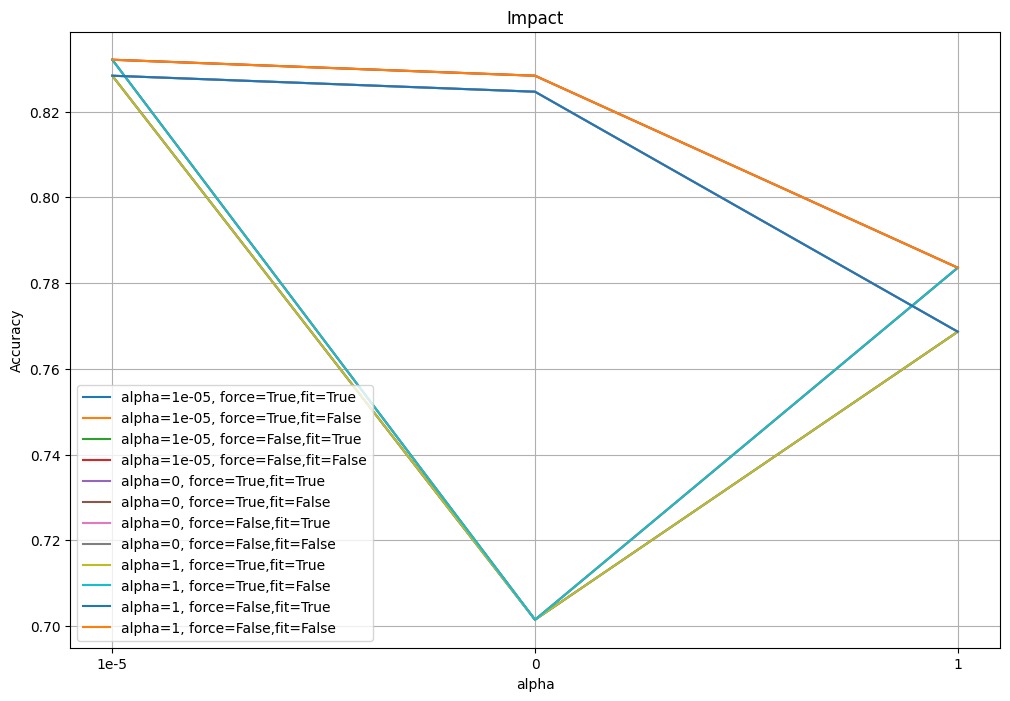

In [154]:
alpha_values = [1e-5,0, 1]
alpha_values_ = ['1e-5','0', '1']
fitprior_values = [True,False]
force_values = [True, False]


accuracy_matrix_M = np.zeros((len(alpha_values), len(force_values), len(fitprior_values)))

for i, a in enumerate(alpha_values):
    for j, force in enumerate(force_values):
        for k, fit in enumerate(fitprior_values):
            M_model = BernoulliNB(alpha=a, force_alpha=force, fit_prior=fit)        
            M_model.fit(Xtrain_, ytrain)
            
            M_ypred = M_model.predict(Xtest_)    
            accuracy = accuracy_score(ytest, M_ypred)
            
            accuracy_matrix_M[i, j, k] = accuracy

plt.figure(figsize=(12, 8))
for i, a in enumerate(alpha_values):
    for j, force in enumerate(force_values):
        for k, fit in enumerate(fitprior_values):
            plt.plot(alpha_values_, accuracy_matrix_M[:, j, k], label=f"alpha={a}, force={force},fit={fit}")

plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Impact')
plt.legend()
plt.grid(True)

In [155]:
B_max_model = BernoulliNB(alpha=1e-5, force_alpha=True, fit_prior=False)        
B_max_model.fit(Xtrain_, ytrain)
dump(B_max_model, open("../data/processed/Models/Bernouilli.sav", "wb"))

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Multinomial

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log


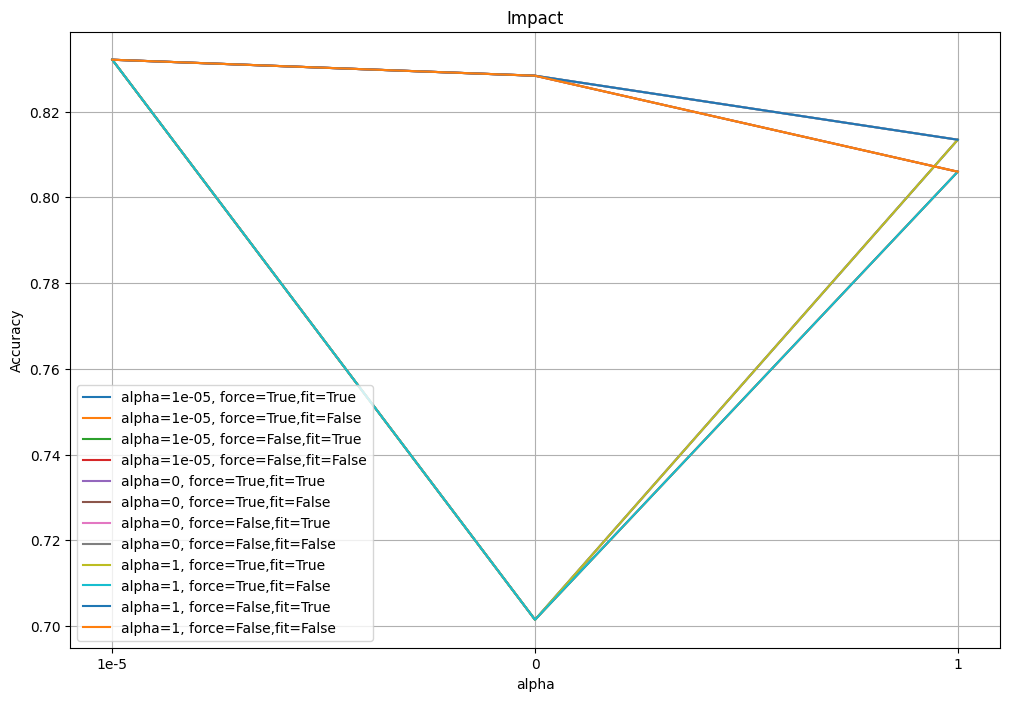

In [135]:
alpha_values = [1e-5,0, 1]
alpha_values_ = ['1e-5','0', '1']
fitprior_values = [True,False]
force_values = [True, False]


accuracy_matrix_M = np.zeros((len(alpha_values), len(force_values), len(fitprior_values)))

for i, a in enumerate(alpha_values):
    for j, force in enumerate(force_values):
        for k, fit in enumerate(fitprior_values):
            M_model = MultinomialNB(alpha=a, force_alpha=force, fit_prior=fit)        
            M_model.fit(Xtrain_, ytrain)
            
            M_ypred = M_model.predict(Xtest_)    
            accuracy = accuracy_score(ytest, M_ypred)
            
            accuracy_matrix_M[i, j, k] = accuracy

plt.figure(figsize=(12, 8))
for i, a in enumerate(alpha_values):
    for j, force in enumerate(force_values):
        for k, fit in enumerate(fitprior_values):
            plt.plot(alpha_values_, accuracy_matrix_M[:, j, k], label=f"alpha={a}, force={force},fit={fit}")

plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Impact')
plt.legend()
plt.grid(True)

In [165]:
M_max_model = MultinomialNB (alpha=1e-5, force_alpha=True, fit_prior=False)        
M_max_model.fit(Xtrain_, ytrain)
dump(M_max_model, open("../data/processed/Models/Multinomial.sav", "wb"))

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Gaussian

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

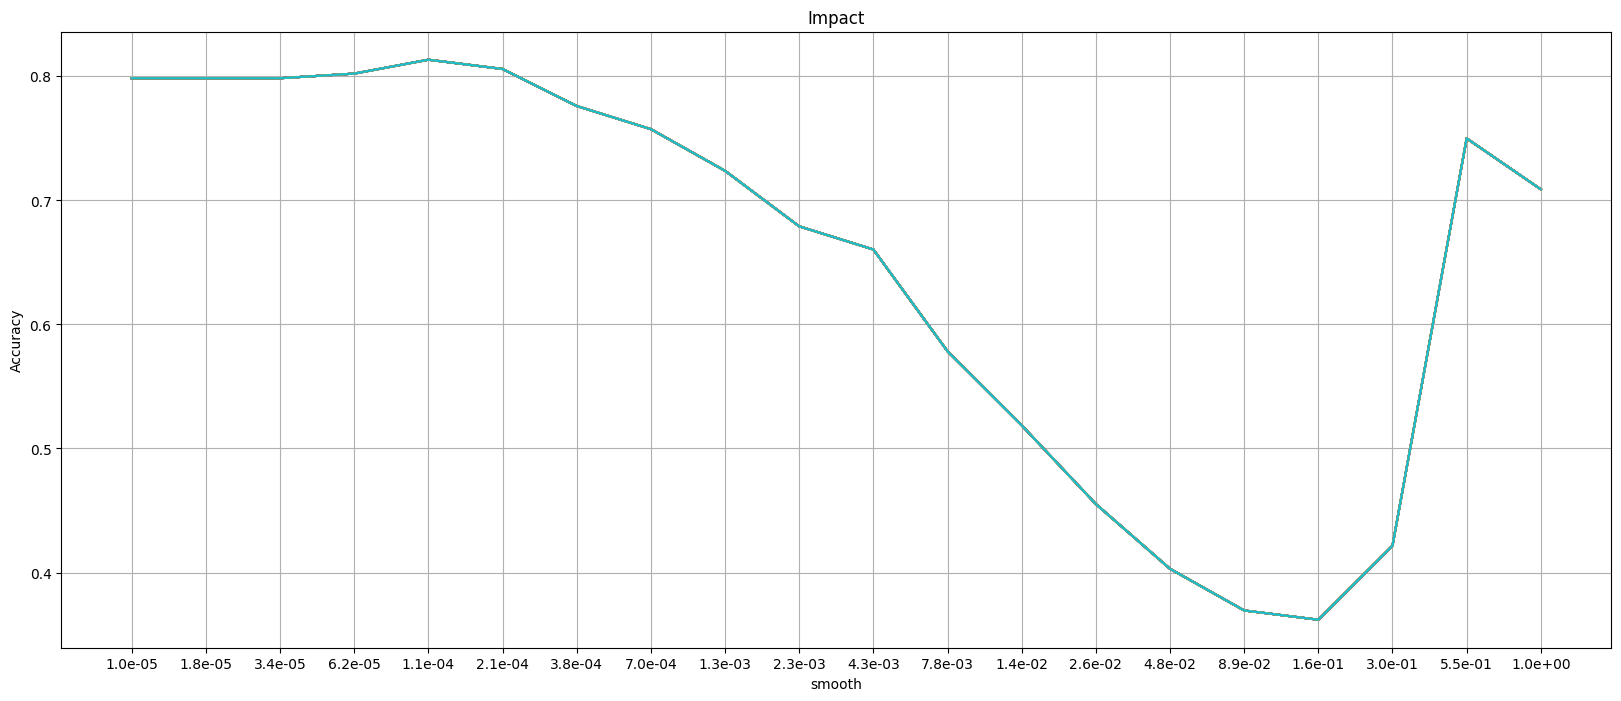

In [152]:
smooth_values = np.logspace(-5, 0, 20)
smooth_values_ = ["{:.1e}".format(value) for value in smooth_values]
#for i in range(len(smooth_values)):
#    smooth_values_.append(str(f"{smooth_values[i]:.2f}"))

accuracy_matrix_G = np.zeros(len(smooth_values))

for i, a in enumerate(smooth_values):
    G_model = GaussianNB(var_smoothing=a)        
    G_model.fit(Xtrain_, ytrain)
    
    G_ypred = G_model.predict(Xtest_)    
    accuracy = accuracy_score(ytest, G_ypred)
    
    accuracy_matrix_G[i] = accuracy

plt.figure(figsize=(20, 8))
for i, a in enumerate(smooth_values):
    plt.plot(smooth_values_, accuracy_matrix_G[:], label=f"smooth={a}")

plt.xlabel('smooth')
plt.ylabel('Accuracy')
plt.title('Impact')
plt.grid(True)

In [158]:
G_max_model = GaussianNB(var_smoothing=1.1e-4)        
G_max_model.fit(Xtrain_, ytrain)
dump(G_max_model, open("../data/processed/Models/Gaussian.sav", "wb"))

/home/taticc/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


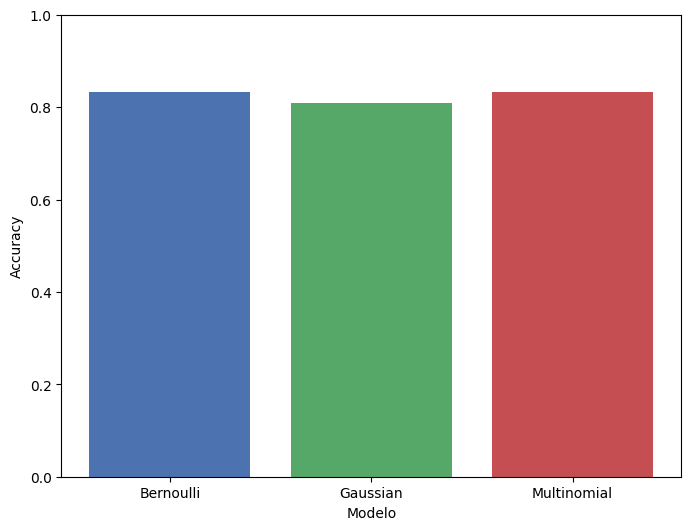

In [166]:
Bypred = B_max_model.predict(Xtest_)
Bac = accuracy_score(Bypred,ytest)

Mypred = M_max_model.predict(Xtest_)
Mac = accuracy_score(Mypred,ytest)

Gypred = G_max_model.predict(Xtest_)
Gac = accuracy_score(Gypred,ytest)

Acc = [Bac,Gac,Mac]
compare(Acc)

In [167]:
print(Acc)

[0.832089552238806, 0.8097014925373134, 0.832089552238806]
